# **GROUP 8 - Solutions to P07: Bayesian inference**

**Students:**
- Marek Majoch, <s13mmajo@uni-bonn.de>, M.Sc Astrophysics
- Yanhanle Lauryn Zhao, <s19yzhao@uni-bonn.de>, M.Sc Astrophysics
- Diana Victoria Lopez Navarro, <s09dlope@uni-bonn.de>, M.Sc Astrophysics
- Rutul Kumar, <s23rkuma@uni-bonn.de>, M.Sc Astrophysics

**Deadline:** 27. Nov 2024, 13:00 
_______________________________________________________


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, norm

## Problem 1: Posterior mean of Gaussian random variable

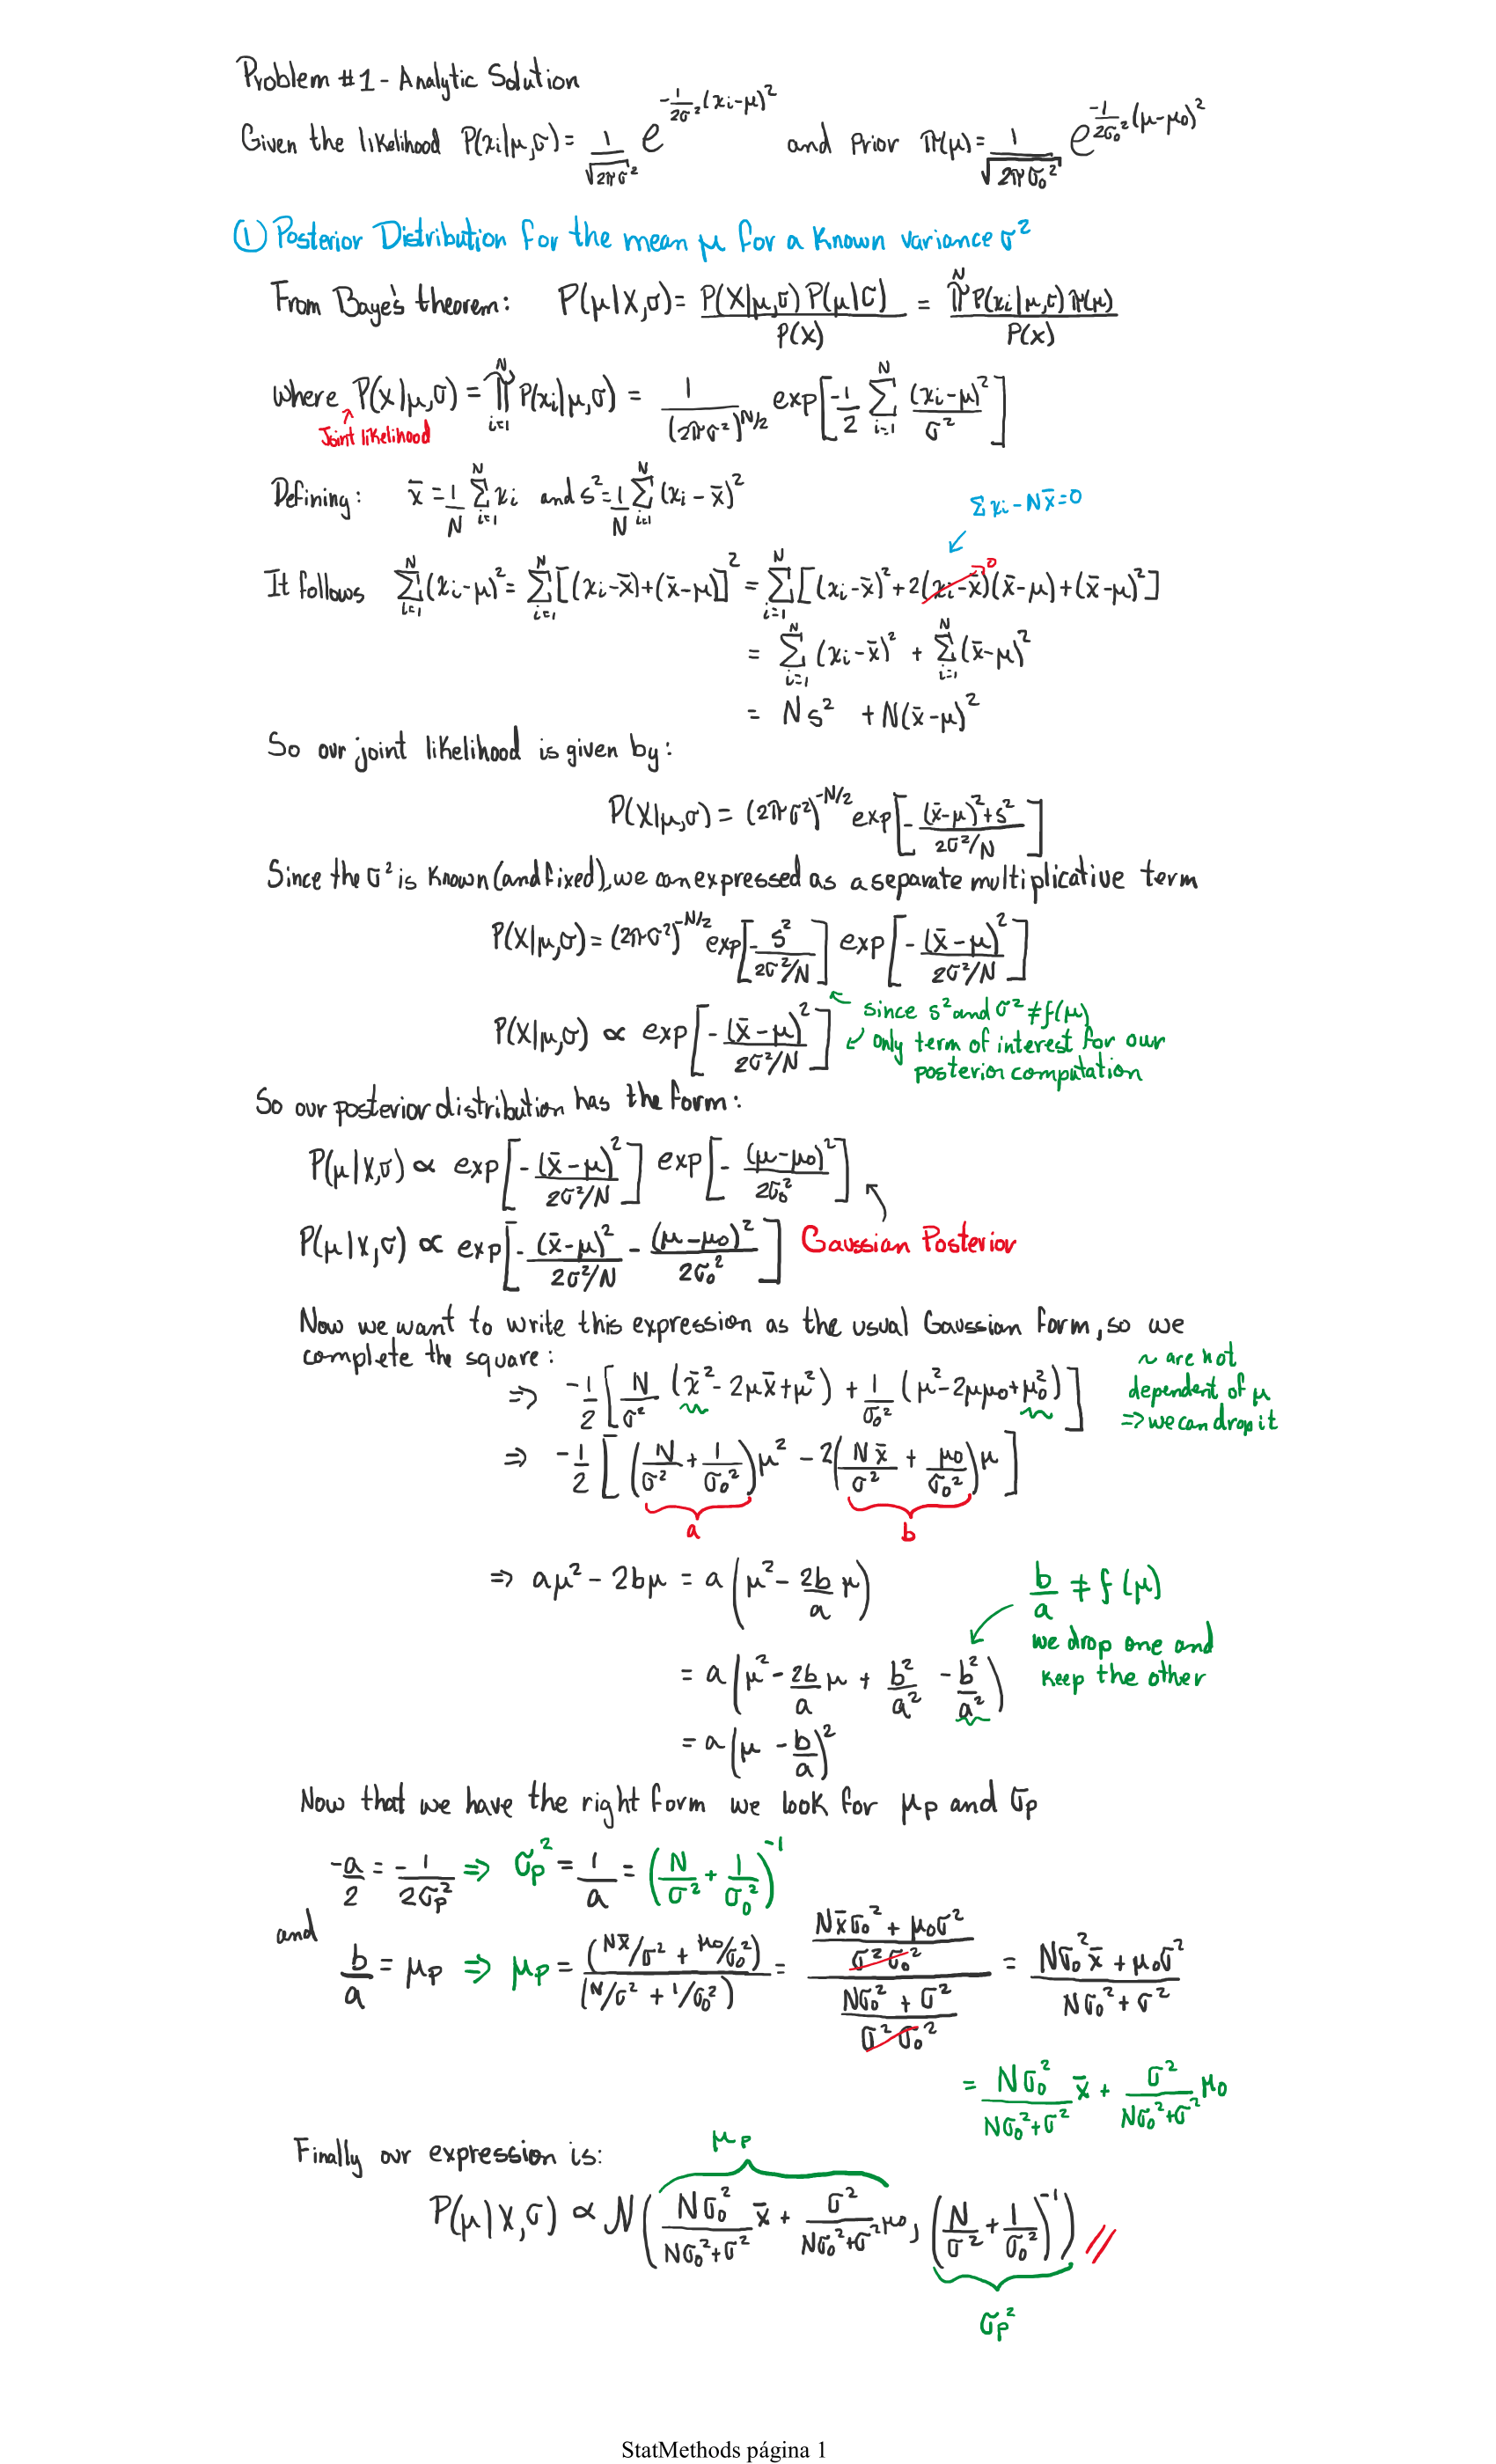![title](./data/P1-07a.png)

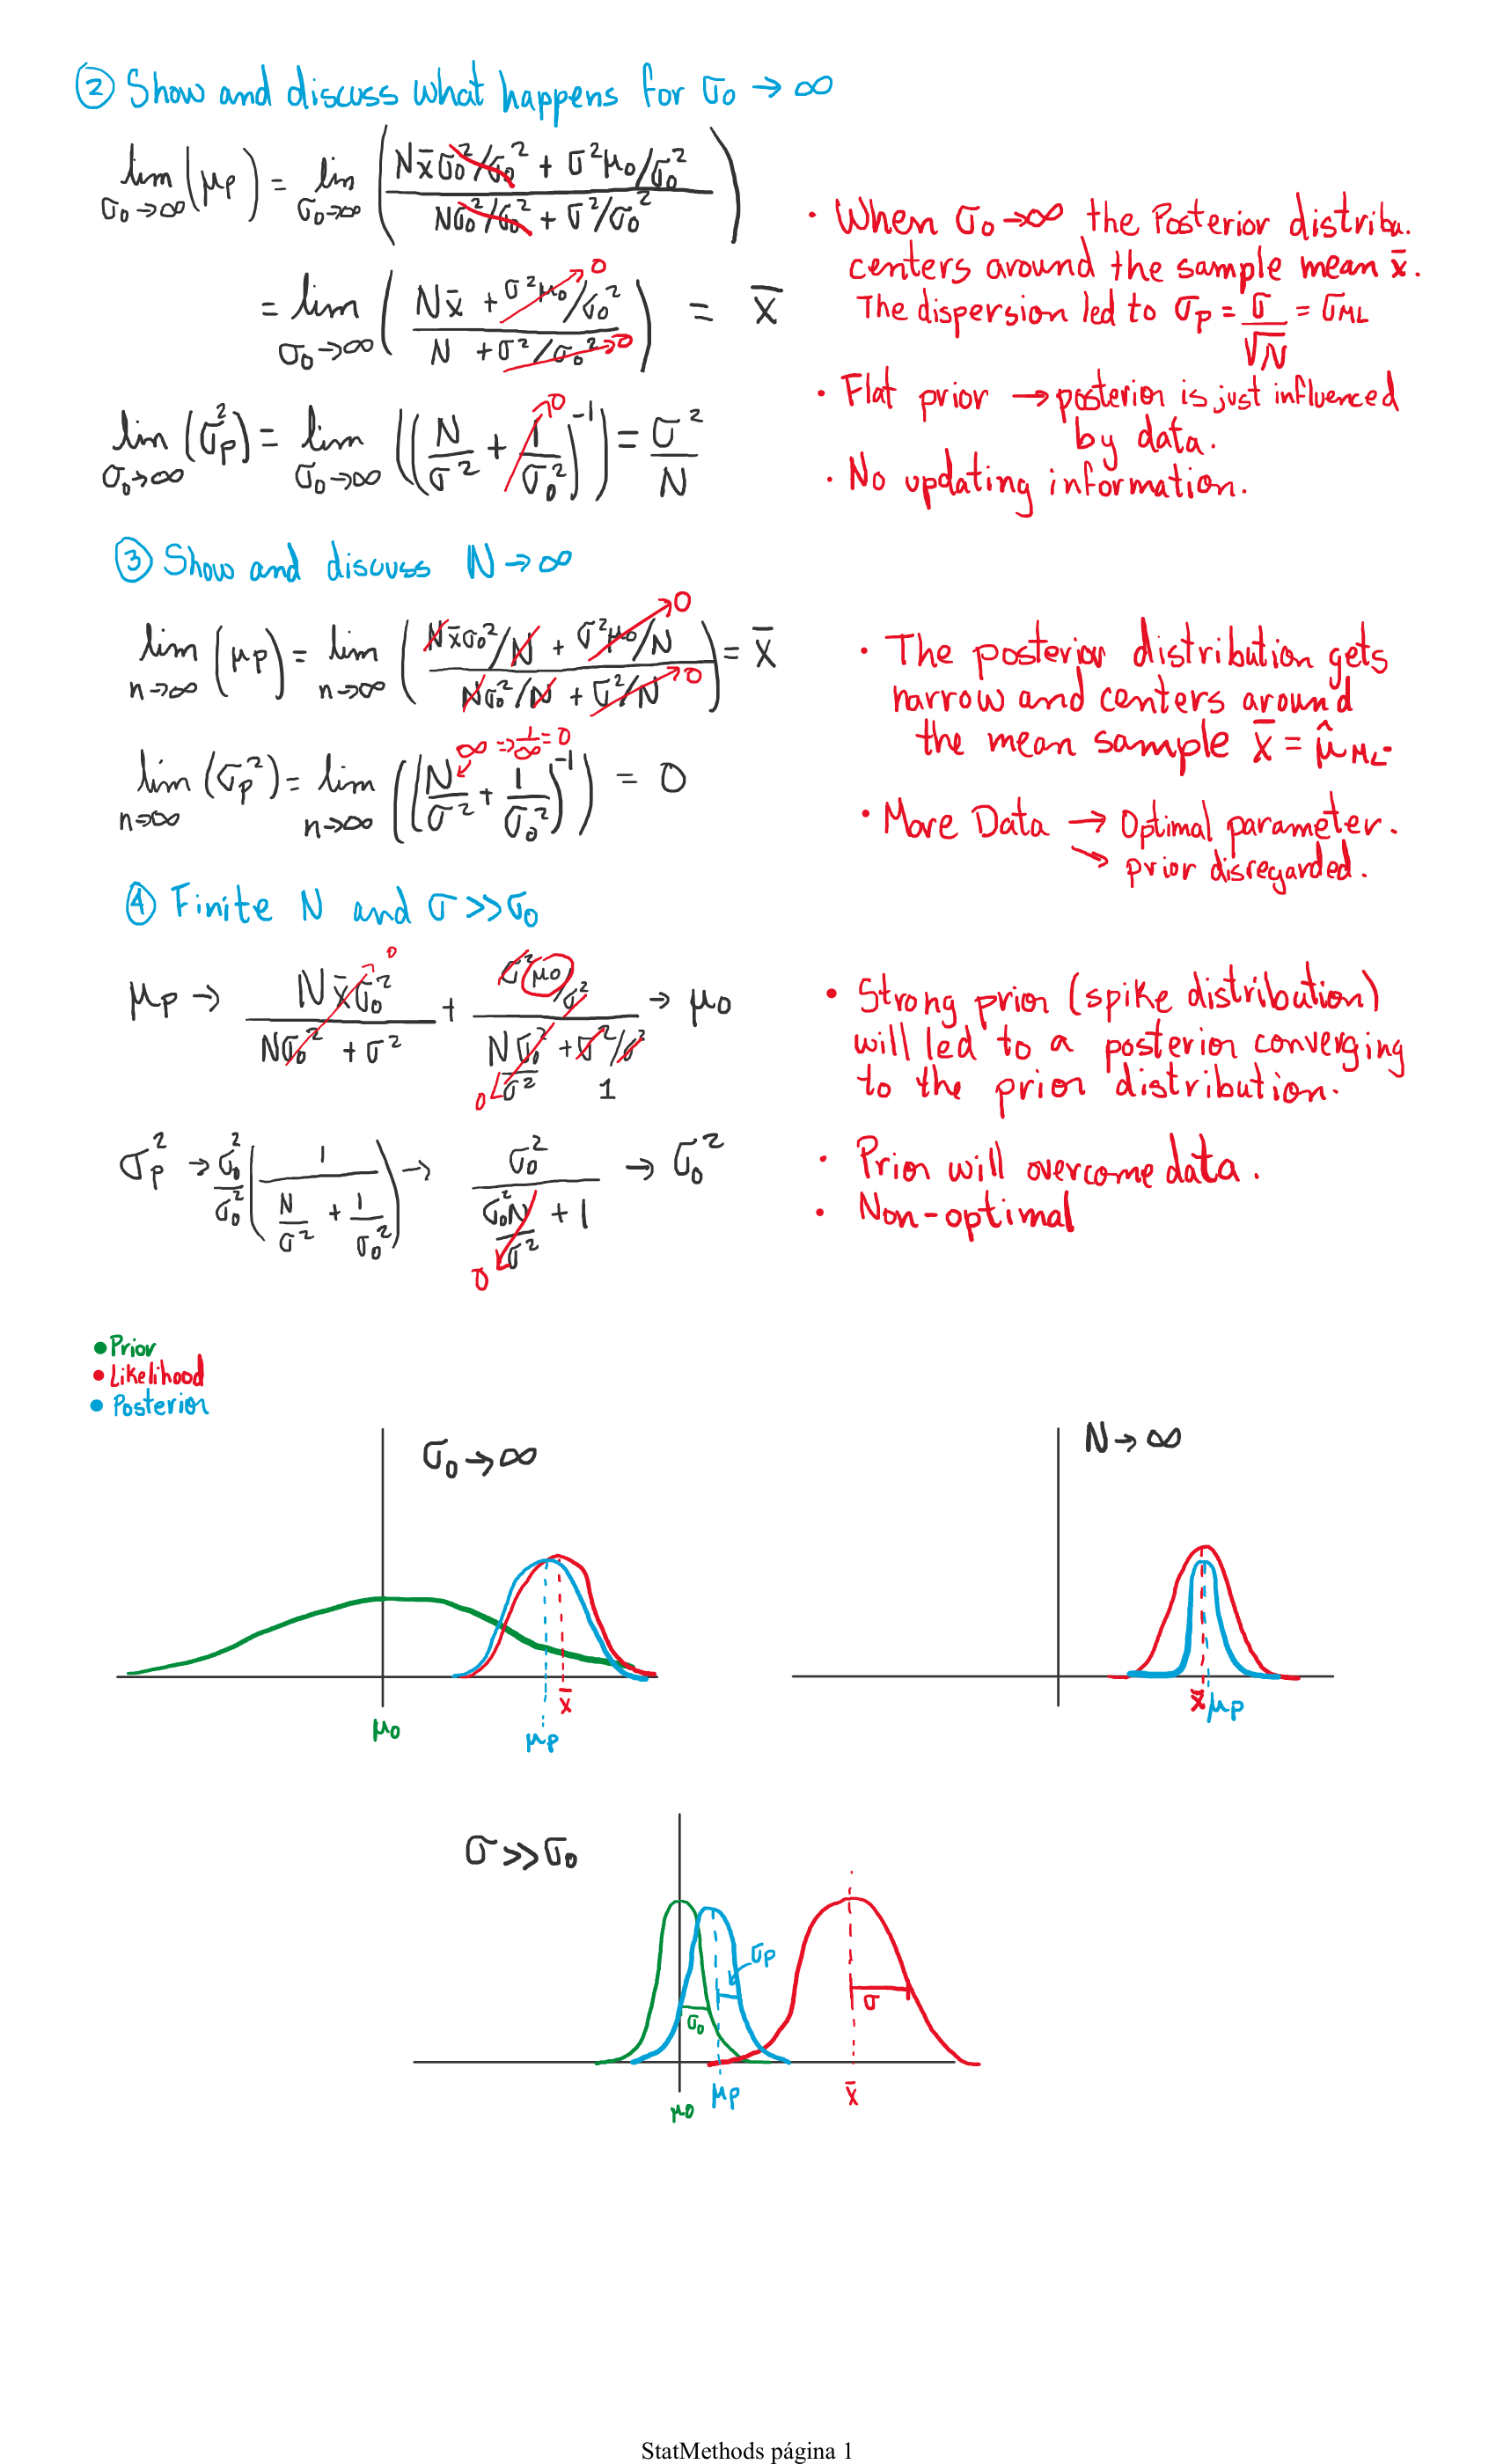![title](./data/P1-07b.png)

## Problem 2: Posterior mean of Gaussian random variable with unknown variance

Let us repeat the experiment from problem 1, but this time assuming that we do not know the variance in the measurement a priori. Therefore we would like to estimate both the mean and the variance from the data. We assume a *reference prior* on both mean and variance. This results in a uniform prior on $\mu$ and a uniform prior on $\log{\sigma}$ which leads to the joint prior $$\pi(\mu, \sigma) = \frac{1}{\sigma}.$$ 
(i) Using Bayes' Theorem, determine the posterior of the mean by marginalizing the posterior $p(\mu, \sigma \vert D)$ over $\sigma$ i.e. $$p(\mu \vert D) = \int p(\mu, \sigma \vert D) d\sigma.$$
(ii) Do you recognize the distribution? What is the difference with our earlier discussion of this distribution?

**Note**: A reference prior is a prior with which the contribution of the data to the posterior is maximized. This leads to different priors for location and scale parameters (denoted $\theta$) of a pdf, which we can understand intuitively:
* location parameter (measures the location of the pdf, e.g. mean): if we are ignorant about where to center the pdf, we apply a uniform prior on the real axis, i.e. $\pi(\theta) \propto 1$.
* scale parameter (measures the dispersion of the pdf, e.g. variance): if we are ignorant about the dispersion of the pdf, we apply a prior that equally treats each order of magnitude i.e. is uniform in $\log{\theta}$; this is equivalent to $\pi(\theta) \propto \frac{1}{\theta}$.

$$p(\mu \vert D) = \int_0^\infty p(\mu, \sigma \vert D) d\sigma=\int_0^\infty \frac{p(D \vert \mu, \sigma)\pi(\mu,\sigma)}{p(D)} d\sigma $$

Since D is given as $D={x_{1}, x_{2}, ..., x_{n}}$ and likelihood of $x_{i}$:
$$P(x_{i}\vert \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^{2}}}e^{-\frac{1}{2 \sigma^{2}}(x_{i}-\mu)^{2}}$$
$${p(D \vert \mu, \sigma)}=\Pi_i\frac{1}{\sqrt{2 \pi \sigma^{2}}}e^{-\frac{1}{2 \sigma^{2}}(x_{i}-\mu)^{2}}$$

Inserting likelihood $p(D \vert \mu, \sigma)$ and known $\pi(\mu,\sigma)=\frac{1}{\sigma}$ to $p(\mu \vert D)$:
$$p(\mu \vert D)=\frac{1}{p(D)}\int_0^\infty \frac{1}{\sigma}  \Pi_i \left(\frac{1}{\sqrt{2 \pi \sigma^{2}}} \exp{\left(-\frac{1}{2 \sigma^{2}}(x_{i}-\mu)^{2}\right)}\right)d\sigma =$$  $$=\frac{e^n}{p(D) \left(\sqrt{2 \pi}\right)^n} \int_0^\infty \frac{1}{  \sigma^{n+1}} \exp{\left(-\frac{1}{ 2 \sigma^{2}}\left(\Sigma_i (x_{i}-\mu)^{2}\right)\right)}d\sigma $$

Let's use variable substitution: $t=\frac{1}{\sigma^2}, \sigma=\frac{1}{\sqrt{t}}, d\sigma=-\frac{1}{2}t^{-\frac{3}{2}}dt$, limits: $\sigma \xrightarrow{} \infty$ to  $t \xrightarrow{} 0$ and $\sigma \xrightarrow{} 0$ to $t\xrightarrow{} \infty$ :

$$p(\mu \vert D)=\frac{e^n}{p(D) \left(\sqrt{2 \pi}\right)^n} \int_\infty^0t^{\frac{n+1}{2}} \exp{\left(-\frac{t}{ 2}\left(\Sigma_i (x_{i}-\mu)^{2}\right)\right)} \left(-\frac{1}{2}t^{-\frac{3}{2}}\right)dt =\frac{e^n}{p(D) \left(\sqrt{2 \pi}\right)^n} \left(-\frac{1}{2}\right)\int_\infty^0t^{\frac{n-2}{2}} \exp{\left(-\frac{t}{ 2}\left(\Sigma_i (x_{i}-\mu)^{2}\right)\right)}dt $$

Reverting limits result in negative integral, thus negating minus from variable substitution:

$$p(\mu \vert D)=\frac{e^n}{2p(D) \left(\sqrt{2 \pi}\right)^n}\int_0^\infty t^{\frac{n-2}{2}} \exp{\left(-\frac{t}{ 2}\left(\Sigma_i (x_{i}-\mu)^{2}\right)\right)}dt $$

This is known gamma function, resulting in Student's t-distribution.

## Problem 3: The effect of the prior

Imagine you are performing a coin toss experiment with a friend: essentially, your friend flips a coin $n$ times and you document the outcomes. Based on the outcome after $n$ tosses, you want to estimate the probability of getting a head (i.e. if the coin is fair or not).

Let $\theta$ be the probability of getting a head with a given coin. Then the probability of obtaining $h$ heads when tossing a coin $n$ times is given by the Binomial distribution as $$p(h|\theta)=\theta^h(1-\theta)^{n-h}.$$

(i) Let us assume you have made the 1000 observations given in `coin_tosses_1.txt`, where 1 denotes head and 0 denotes tails. Further assume that you trust your friend and assume a flat pior. Use Bayes' theorem to derive the posterior for $\theta$. Plot the distribution after 10, 50, 100, 500 and 1000 tosses. What do you observe?

(ii) You and your friend now repeat the experiment with another coin and obtain the measurements in `coin_tosses_2.txt`. Based on your experience from (i), you assume a Gaussian prior on $\theta$ centered at 0.5 with a standard deviation of 0.2. Use Bayes' theorem to derive the posterior for $\theta$. Plot the distribution after 10, 50, 100, 500 and 1000 tosses. What do you observe?